# NLP with Probabilistic Models
## Autocorrect and Minimum Edit Distance
### Autocorrect
`Autocorrect is an application that changes the mispelled words into correct ones. Key steps include:`
* Identify a misspelled word
    * If a word doesnt exist in dictionar, it is probably mis-spelled
    * If a word is not in a dictionary, flag it for correction
* Find string n-edits distance away
    * An edit is type of operation performed on a string to change it inot another string
    * An edit distance counts the number of these operations
    * n-distance telss how many operations away one string is from another
    * Includes
        * Insert (add a letter)
        * Delete (remove a letter)
        * Switch (exchange places)
        * Replace
    * If string is one edit distance away from the string typed, it is more similar to string compared to a string that is two edit distance away
* Filter the strings for real words that are spelled correctly
    * Strings generated do not look like actual words. We may want to consider real and correctly spelled words so we compare it to a known dictionary
* Calculate word probabilities
    * Haivng a list of words, we can calculate word probabilites of each word in the corpous (corpous is body of text)
    * First calculate frequencies
        * Calculate the total number of words in the body of text or corpous
        * Probability of any word within the corpus is the number of times the word appears divided by total number of words
        
Given the dictionary of word counts, compute the probability that each word will appear if randomly selected from the corpus of words.

$$P(w_i) = \frac{C(w_i)}{M} \tag{Eqn-2}$$
where 

$C(w_i)$ is the total number of times $w_i$ appears in the corpus.

$M$ is the total number of words in the corpus.


In [119]:
# all the libraries and modules used in the course

import numpy as np
import pandas as pd
import re # regular expression library; for tokenization of words
from collections import Counter # collections library; counter: dict subclass for counting hashable objects
import matplotlib.pyplot as plt # for data visualization
import nltk               # NLP toolkit
import re                 # Library for Regular expression operations
from collections import defaultdict

import re
import nltk

nltk.download('punkt')

import emoji
import numpy as np
from nltk.tokenize import word_tokenize

from typing import Set, Dict, List

nltk.download('punkt')    # Download the Punkt sentence tokenizer 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
# the tiny corpus of text !
text : str = "I am currently enrolled in NATURAL LANGUAGE PROCESSING Specialisatoin and I am really happy with SPECIALISATION"  # 🌈
print(text)
print("string length : ", len(text))

# preprocessing

text_lowercase : str = text.lower() #converting the text to lowercase
words : str = re.findall(r'\w+', text_lowercase)
print(words)
print("Count: ", len(words))

I am currently enrolled in NATURAL LANGUAGE PROCESSING Specialisatoin and I am really happy with SPECIALISATION
string length :  111
['i', 'am', 'currently', 'enrolled', 'in', 'natural', 'language', 'processing', 'specialisatoin', 'and', 'i', 'am', 'really', 'happy', 'with', 'specialisation']
Count:  16


In [13]:
# creating vocabulary

vocab : Set = set(words) #using set to remove all the repetitive words
print(vocab)
print(f"Count: ", len(vocab))


{'natural', 'language', 'and', 'enrolled', 'happy', 'am', 'specialisatoin', 'with', 'currently', 'processing', 'i', 'in', 'really', 'specialisation'}
Count:  14


In [20]:
# creating vocab including word count using collections.Counter

counts_b: Dict[str, int] = dict()
counts_b = Counter(words)
print(counts_b)
print(f"Count: ", len(counts_b))

Counter({'i': 2, 'am': 2, 'currently': 1, 'enrolled': 1, 'in': 1, 'natural': 1, 'language': 1, 'processing': 1, 'specialisatoin': 1, 'and': 1, 'really': 1, 'happy': 1, 'with': 1, 'specialisation': 1})
Count:  14


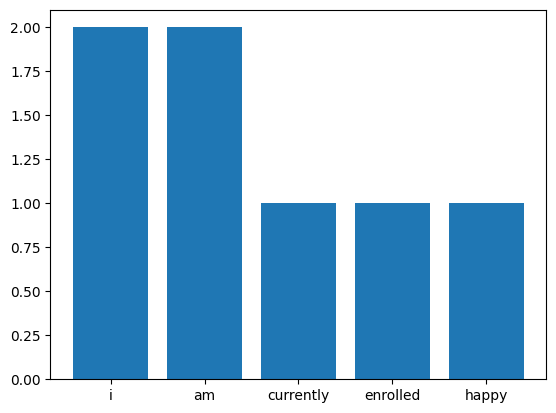

In [21]:
# bar chart for sorted word counts
d: Dict = {
    "i": counts_b["i"],
    "am": counts_b["am"],
    "currently": counts_b["currently"],
    "enrolled": counts_b["enrolled"],
    "happy": counts_b["happy"],
}
plt.bar(range(len(d)), list(d.values()), align="center")
_ = plt.xticks(range(len(d)), list(d.keys()))

In [27]:
counts_b["hello"] = 5
print("counts_b : ", counts_b)
print("count : ", len(counts_b))

counts_b :  Counter({'hello': 5, 'i': 2, 'am': 2, 'new_word': 2, 'currently': 1, 'enrolled': 1, 'in': 1, 'natural': 1, 'language': 1, 'processing': 1, 'specialisatoin': 1, 'and': 1, 'really': 1, 'happy': 1, 'with': 1, 'specialisation': 1})
count :  16


In [28]:
word = 'hallo'
# splitting the word with a loop
splits_a : List[str] = []
for i in range(len(word)+1):
    splits_a.append([word[:i], word[i:]])
    
for i in splits_a:
    print(i)

['', 'hallo']
['h', 'allo']
['ha', 'llo']
['hal', 'lo']
['hall', 'o']
['hallo', '']


In [29]:
# the same split can be done using a list comprehension

splits_b : List[str] = [(word[:i], word[i:]) for i in range(len(word)+1)]

for i in splits_b:
    print(i)

('', 'hallo')
('h', 'allo')
('ha', 'llo')
('hal', 'lo')
('hall', 'o')
('hallo', '')


In [35]:
# delete a word from each string in the splits list

splits = splits_a
deletes : List[str] = []

for L, R in splits:
    if R:
        print(L + R[1:])
        print(L + R[1:], " <-- delete ", R[0])

allo
allo  <-- delete  h
hllo
hllo  <-- delete  a
halo
halo  <-- delete  l
halo
halo  <-- delete  l
hall
hall  <-- delete  o


In [37]:
# deletes with a list comprehension
splits = splits_a
deletes = [L + R[1:] for L, R in splits if R]

print(deletes)

['allo', 'hllo', 'halo', 'halo', 'hall']


### Minimum Edit Distance
Minimium edit distance has wide variety of applications such as implementing spelling correction, document similarity, machine translation, DNA sequencing. It  can be used to evaluate similarity between 2 strings. Given two strings, the minimum distance is the lowest number of operation needed to transform one string into another. `Total edit cost is the sum of cost for edit that were made`. 
* Insert Cost -> 1
* Delete Cost -> 1
* Replace Cost -> 2
<br/>
Tabular approach allows to speed up the enumeration of all possible strings and edits. When computing the minimum distance, we should start with a source word and transform it into the target word. Consider example <br/> <br/>

Stay (source word) -> Play (target word) <br/> <br/>

From going to `pl` to empty string `''`, minimum edit will be 2 because it involves deleting 2 items `'p'` and `'l'`. Similarly from going to `p -> s` have 2 cost operation as it involve insertion and deletion. The method used is called `Levenshtein distance`. It is the minimum number of single-character edits required to change one string into the other. <br/>

`Dynammic Programming`, intuitively, means that solving the smalled sub-problem first and then resuing that result to solve next biggest sub-problem, saving that result and reusing it again,


## Part of Speech Tagging and Hidden Markov Models
`Part of speech tagging (POS)`is fundamental task in NLP that involves assiging a specific grammatical category to each word in a give text. The primary goal is to analysze and undertand grammatical structure of a sentence. We will be using short representation called `tags` to represent these categories. Consider the following example:

`The quick brown fox jumps over the lazy dog`

A POS Tagger would analyze this sentence and assign parts of speech to each word resulting in
* "The" -> Determiner
* "quick" -> Adjective
* "brown" -> Adjective
* "fox" -> Noun
* "jumps" -> Verb
* "over" -> Preposition
* "the" -> Determiner
* "lazy" -> Adjective
* "dog" -> Noun 

##### Creating a vocabulary (Part of Lab)

Now that you understand how the dataset is structured, you will create a vocabulary out of it. A vocabulary is made up of every word that appeared at least 2 times in the dataset. 
For this, follow these steps:
- Get only the words from the dataset
- Use a defaultdict to count the number of times each word appears
- Filter the dict to only include words that appeared at least 2 times
- Create a list out of the filtered dict
- Sort the list

In [40]:
def assign_unk(word):
    """
    Assign tokens to unknown words
    """

    # Punctuation characters
    # Try printing them out in a new cell!
    punct = set(string.punctuation)

    # Suffixes
    noun_suffix = [
        "action",
        "age",
        "ance",
        "cy",
        "dom",
        "ee",
        "ence",
        "er",
        "hood",
        "ion",
        "ism",
        "ist",
        "ity",
        "ling",
        "ment",
        "ness",
        "or",
        "ry",
        "scape",
        "ship",
        "ty",
    ]
    verb_suffix = ["ate", "ify", "ise", "ize"]
    adj_suffix = [
        "able",
        "ese",
        "ful",
        "i",
        "ian",
        "ible",
        "ic",
        "ish",
        "ive",
        "less",
        "ly",
        "ous",
    ]
    adv_suffix = ["ward", "wards", "wise"]

    # Loop the characters in the word, check if any is a digit
    if any(char.isdigit() for char in word):
        return "--unk_digit--"

    # Loop the characters in the word, check if any is a punctuation character
    elif any(char in punct for char in word):
        return "--unk_punct--"

    # Loop the characters in the word, check if any is an upper case character
    elif any(char.isupper() for char in word):
        return "--unk_upper--"

    # Check if word ends with any noun suffix
    elif any(word.endswith(suffix) for suffix in noun_suffix):
        return "--unk_noun--"

    # Check if word ends with any verb suffix
    elif any(word.endswith(suffix) for suffix in verb_suffix):
        return "--unk_verb--"

    # Check if word ends with any adjective suffix
    elif any(word.endswith(suffix) for suffix in adj_suffix):
        return "--unk_adj--"

    # Check if word ends with any adverb suffix
    elif any(word.endswith(suffix) for suffix in adv_suffix):
        return "--unk_adv--"

    # If none of the previous criteria is met, return plain unknown
    return "--unk--"


def get_word_tag(line, vocab):
    # If line is empty return placeholders for word and tag
    if not line.split():
        word = "--n--"
        tag = "--s--"
    else:
        # Split line to separate word and tag
        word, tag = line.split()
        # Check if word is not in vocabulary
        if word not in vocab:
            # Handle unknown word
            tag = assign_unk(word)
    return word, tag

In [41]:
get_word_tag("\n", vocab)

('--n--', '--s--')

### Markov Chain
Markov chains is a type of stochastic model that describes a sequence of possible events. It is a mathemtical model that describes a sequence of events where probability of each event depends only on state of previous event. In context of POS tagging, a Markov chain are employed in POS tagging to capture the dependencies between consecutive POS tags. <br/>
`Markov property` states that the probability of next event only depends on the current event. It helps in keeping model simple by saying all you need to determine next state is the current state <br/>
`Transition matrix` is a sort of table to store the states and transition probabilities. It is a N x N matrix where n = number of states
* Each row in matrix represents transition probabilities of one state to all other states.
    * In simple words, row represents the current state
    * Column represents the next state
<br/>

`For all outgoing transition probabilities of a give state, the sum of these transition probabilities should always be one`

`Hidden markov model (HMM) `implies that states are hidden or not directly observable. HMM are used to model the sequence of observable events (words with POST tags) where the underlying states (hidden states) are the POS tags themselves. <br/>
The `emission probability` refers to the probability of observing a particular data point given the underlying hidden state. The emission matrix represents the probabilites for the transition of your `n` hidden state to `m` words in corpous <br/> <br/>

In order to calculate all the transition probabilities of a Markov Model, count all the occurences of tag pairs in training corpous. Probabilities can be calculated using

`P(ti / ti-1) = C (ti-1, ti) / sum(C (tj-1, tj))`

In smoothing, we add small `e` value to each valye of the transition matrix

$$ P(t_i | t_{i-1}) = \frac{C(t_{i-1}, t_{i}) + \alpha }{C(t_{i-1}) +\alpha * N}\tag{3}$$

- $N$ is the total number of tags
- $C(t_{i-1}, t_{i})$ is the count of the tuple (previous POS, current POS) in `transition_counts` dictionary.
- $C(t_{i-1})$ is the count of the previous POS in the `tag_counts` dictionary.
- $\alpha$ is a smoothing parameter.

In [62]:
# Define tags for Adverb, Noun and To (the preposition) , respectively
tags : List[str] = ["RB", "NN", "TO"]


In [63]:
# transition_coimts is dictionary which counts the number of times a particular tag happened next to each other
transition_counts : Dict[Set[str], int]= {
    ("NN", "NN"): 16241,
    ("RB", "RB"): 2263,
    ("TO", "TO"): 2,
    ("NN", "TO"): 5256,
    ("RB", "TO"): 855,
    ("TO", "NN"): 734,
    ("NN", "RB"): 2431,
    ("RB", "NN"): 358,
    ("TO", "RB"): 200,
}

In [64]:
# create a matrix that includes these frequencies

num_tags : int = len(tags)
# Initialize a 3X3 numpy array with zeros
transition_matrix : np.matrix = np.zeros((num_tags, num_tags))

# Print matrix
transition_matrix

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [65]:
# Print shape of the matrix
transition_matrix.shape

(3, 3)

In [66]:
# Create sorted version of the tag's list
sorted_tags : List[str] = sorted(tags)

# Print sorted list
sorted_tags

['NN', 'RB', 'TO']

In [67]:
# to fill the matrix with correct values, we can use double for loop or itertools.product
for i in range(num_tags):
    # Loop columns
    for j in range(num_tags):
        # Define tag pair
        tag_tuple = (sorted_tags[i], sorted_tags[j])
        # Get frequency from transition_counts dict and assign to (i, j) position in the matrix
        transition_matrix[i, j] = transition_counts.get(tag_tuple)

# Print matrix
transition_matrix

array([[1.6241e+04, 2.4310e+03, 5.2560e+03],
       [3.5800e+02, 2.2630e+03, 8.5500e+02],
       [7.3400e+02, 2.0000e+02, 2.0000e+00]])

In [68]:
# Define 'print_matrix' function
def print_matrix(matrix):
    print(pd.DataFrame(matrix, index=sorted_tags, columns=sorted_tags))


# Print the 'transition_matrix' by calling the 'print_matrix' function
print_matrix(transition_matrix)

         NN      RB      TO
NN  16241.0  2431.0  5256.0
RB    358.0  2263.0   855.0
TO    734.0   200.0     2.0


In [70]:
# Scale transition matrix
transition_matrix = transition_matrix / 10

# Print scaled matrix
print_matrix(transition_matrix)

rows_sum = transition_matrix.sum(axis=1, keepdims=True)

# Print sum of rows
rows_sum

        NN     RB     TO
NN  162.41  24.31  52.56
RB    3.58  22.63   8.55
TO    7.34   2.00   0.02


array([[239.28],
       [ 34.76],
       [  9.36]])

In [72]:
# Normalize transition matrix
transition_matrix = transition_matrix / rows_sum

# Print normalized matrix
print_matrix(transition_matrix)

transition_matrix.sum(axis=1, keepdims=True)

          NN        RB        TO
NN  0.002837  0.000425  0.000918
RB  0.002963  0.018729  0.007076
TO  0.083781  0.022829  0.000228


array([[0.0041792 ],
       [0.0287687 ],
       [0.10683761]])

In [73]:
import math

# Copy transition matrix for for-loop example
t_matrix_for = np.copy(transition_matrix)

# Copy transition matrix for numpy functions example
t_matrix_np = np.copy(transition_matrix)

In [74]:
# Loop values in the diagonal
for i in range(num_tags):
    t_matrix_for[i, i] = t_matrix_for[i, i] + math.log(rows_sum[i])

# Print matrix
print_matrix(t_matrix_for)

          NN        RB        TO
NN  5.480471  0.000425  0.000918
RB  0.002963  3.567197  0.007076
TO  0.083781  0.022829  2.236674


C:\Users\Admin\AppData\Local\Temp\ipykernel_8184\629177989.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t_matrix_for[i, i] = t_matrix_for[i, i] + math.log(rows_sum[i])


In [75]:
# Save diagonal in a numpy array
d = np.diag(t_matrix_np)

# Print shape of diagonal
d.shape

(3,)

In [76]:
# Reshape diagonal numpy array
d = np.reshape(d, (3, 1))

# Print shape of diagonal
d.shape

(3, 1)

In [80]:
# Perform the vectorized operation
d = d + np.vectorize(math.log)(rows_sum)

# Use numpy's 'fill_diagonal' function to update the diagonal
np.fill_diagonal(t_matrix_np, d)

# Print the matrix
print_matrix(t_matrix_np)

           NN         RB        TO
NN  16.435740   0.000425  0.000918
RB   0.002963  10.664131  0.007076
TO   0.083781   0.022829  6.709564


In [81]:
# Check for equality
t_matrix_for == t_matrix_np

array([[False,  True,  True],
       [ True, False,  True],
       [ True,  True, False]])

### Viterbi Algorithm
`Viterbi algorithm` is a dynamic programming algorithm that is used to find most probable sequence of POS tags for a give sentence. The algorithm is used to calculate the best path to a node and to find the path to each node with the lowest negative log probability. Three main steps to populate auxiliary matrixes C and D
* Intialization
    * In this step, the first column of  C and D are populated.
    * The first column of C represents probability of the transitions from the state state to first tag (t-1) and word (w1)
        * Ci,1 = a1i *bi, index
* Forward pass
    * All the remaining entries in the two matrices C and D are populated column by column during the forward pass
* Backward pass

### Week 3 Lab-1

\begin{equation*}
P(w_n|w_1^{n-1})=\frac{C(w_1^n)}{C(w_1^{n-1})}
\end{equation*}


In [91]:
# change the corpus to lowercase
corpus = "Learning% makes 'me' happy. I am happy be-cause I am learning! :)"
corpus = corpus.lower()

# note that word "learning" will now be the same regardless of its position in the sentence
print(corpus)

learning% makes 'me' happy. i am happy be-cause i am learning! :)


In [92]:
# remove special characters
corpus = "learning% makes 'me' happy. i am happy be-cause i am learning! :)"
corpus = re.sub(r"[^a-zA-Z0-9.?! ]+", "", corpus)
print(corpus)

learning makes me happy. i am happy because i am learning! 


In [93]:
# split text by a delimiter to array
input_date = "Sat May  9 07:33:35 CEST 2020"

# get the date parts in array
date_parts = input_date.split(" ")
print(f"date parts = {date_parts}")

# get the time parts in array
time_parts = date_parts[4].split(":")
print(f"time parts = {time_parts}")

date parts = ['Sat', 'May', '', '9', '07:33:35', 'CEST', '2020']
time parts = ['07', '33', '35']


In [94]:
# tokenize the sentence into an array of words

sentence = "i am happy because i am learning."
tokenized_sentence = nltk.word_tokenize(sentence)
print(f"{sentence} -> {tokenized_sentence}")

i am happy because i am learning. -> ['i', 'am', 'happy', 'because', 'i', 'am', 'learning', '.']


In [95]:
# find length of each word in the tokenized sentence
sentence = ["i", "am", "happy", "because", "i", "am", "learning", "."]
word_lengths = [
    (word, len(word)) for word in sentence
]  # Create a list with the word lengths using a list comprehension
print(f" Lengths of the words: \n{word_lengths}")

 Lengths of the words: 
[('i', 1), ('am', 2), ('happy', 5), ('because', 7), ('i', 1), ('am', 2), ('learning', 8), ('.', 1)]


In [96]:
def sentence_to_trigram(tokenized_sentence):
    """
    Prints all trigrams in the given tokenized sentence.

    Args:
        tokenized_sentence: The words list.

    Returns:
        No output
    """
    # note that the last position of i is 3rd to the end
    for i in range(len(tokenized_sentence) - 3 + 1):
        # the sliding window starts at position i and contains 3 words
        trigram = tokenized_sentence[i : i + 3]
        print(trigram)


tokenized_sentence = ["i", "am", "happy", "because", "i", "am", "learning", "."]

print(f"List all trigrams of sentence: {tokenized_sentence}\n")
sentence_to_trigram(tokenized_sentence)

List all trigrams of sentence: ['i', 'am', 'happy', 'because', 'i', 'am', 'learning', '.']

['i', 'am', 'happy']
['am', 'happy', 'because']
['happy', 'because', 'i']
['because', 'i', 'am']
['i', 'am', 'learning']
['am', 'learning', '.']


In [97]:
# get trigram prefix from a 4-gram
fourgram = ["i", "am", "happy", "because"]
trigram = fourgram[
    0:-1
]  # Get the elements from 0, included, up to the last element, not included.
print(trigram)

['i', 'am', 'happy']


### Lab 2
<a name="perplexity"></a>
### Perplexity

In order to implement the perplexity formula, you'll need to know how to implement m-th order root of a variable.

\begin{equation*}
PP(W)=\sqrt[M]{\prod_{i=1}^{m}{\frac{1}{P(w_i|w_{i-1})}}}
\end{equation*}

Remember from calculus:

\begin{equation*}
\sqrt[M]{\frac{1}{x}} = x^{-\frac{1}{M}}
\end{equation*}

Here is a code that will help you with the formula.

In [98]:
# manipulate n_gram count dictionary

n_gram_counts = {("i", "am", "happy"): 2, ("am", "happy", "because"): 1}

# get count for an n-gram tuple
print(f"count of n-gram {('i', 'am', 'happy')}: {n_gram_counts[('i', 'am', 'happy')]}")

# check if n-gram is present in the dictionary
if ("i", "am", "learning") in n_gram_counts:
    print(f"n-gram {('i', 'am', 'learning')} found")
else:
    print(f"n-gram {('i', 'am', 'learning')} missing")

# update the count in the word count dictionary
n_gram_counts[("i", "am", "learning")] = 1
if ("i", "am", "learning") in n_gram_counts:
    print(f"n-gram {('i', 'am', 'learning')} found")
else:
    print(f"n-gram {('i', 'am', 'learning')} missing")

count of n-gram ('i', 'am', 'happy'): 2
n-gram ('i', 'am', 'learning') missing
n-gram ('i', 'am', 'learning') found


In [99]:
# concatenate tuple for prefix and tuple with the last word to create the n_gram
prefix = ("i", "am", "happy")
word = "because"

# note here the syntax for creating a tuple for a single word
n_gram = prefix + (word,)
print(n_gram)

('i', 'am', 'happy', 'because')


In [103]:


def single_pass_trigram_count_matrix(corpus):
    """
    Creates the trigram count matrix from the input corpus in a single pass through the corpus.

    Args:
        corpus: Pre-processed and tokenized corpus.

    Returns:
        bigrams: list of all bigram prefixes, row index
        vocabulary: list of all found words, the column index
        count_matrix: pandas dataframe with bigram prefixes as rows,
                      vocabulary words as columns
                      and the counts of the bigram/word combinations (i.e. trigrams) as values
    """
    bigrams = []
    vocabulary = []
    count_matrix_dict = defaultdict(dict)

    # go through the corpus once with a sliding window
    for i in range(len(corpus) - 3 + 1):
        # the sliding window starts at position i and contains 3 words
        trigram = tuple(corpus[i : i + 3])

        bigram = trigram[0:-1]
        if not bigram in bigrams:
            bigrams.append(bigram)

        last_word = trigram[-1]
        if not last_word in vocabulary:
            vocabulary.append(last_word)

        if (bigram, last_word) not in count_matrix_dict:
            count_matrix_dict[bigram, last_word] = 0

        count_matrix_dict[bigram, last_word] += 1

    # convert the count_matrix to np.array to fill in the blanks
    count_matrix = np.zeros((len(bigrams), len(vocabulary)))
    for trigram_key, trigam_count in count_matrix_dict.items():
        count_matrix[
            bigrams.index(trigram_key[0]), vocabulary.index(trigram_key[1])
        ] = trigam_count

    # np.array to pandas dataframe conversion
    count_matrix = pd.DataFrame(count_matrix, index=bigrams, columns=vocabulary)
    return bigrams, vocabulary, count_matrix


corpus = ["i", "am", "happy", "because", "i", "am", "learning", "."]

bigrams, vocabulary, count_matrix = single_pass_trigram_count_matrix(corpus)

print(count_matrix)

                  happy  because    i   am  learning    .
(i, am)             1.0      0.0  0.0  0.0       1.0  0.0
(am, happy)         0.0      1.0  0.0  0.0       0.0  0.0
(happy, because)    0.0      0.0  1.0  0.0       0.0  0.0
(because, i)        0.0      0.0  0.0  1.0       0.0  0.0
(am, learning)      0.0      0.0  0.0  0.0       0.0  1.0


In [104]:
# create the probability matrix from the count matrix
row_sums = count_matrix.sum(axis=1)
# divide each row by its sum
prob_matrix = count_matrix.div(row_sums, axis=0)

print(prob_matrix)

                  happy  because    i   am  learning    .
(i, am)             0.5      0.0  0.0  0.0       0.5  0.0
(am, happy)         0.0      1.0  0.0  0.0       0.0  0.0
(happy, because)    0.0      0.0  1.0  0.0       0.0  0.0
(because, i)        0.0      0.0  0.0  1.0       0.0  0.0
(am, learning)      0.0      0.0  0.0  0.0       0.0  1.0


In [105]:
# find the probability of a trigram in the probability matrix
trigram = ("i", "am", "happy")

# find the prefix bigram
bigram = trigram[:-1]
print(f"bigram: {bigram}")

# find the last word of the trigram
word = trigram[-1]
print(f"word: {word}")

# we are using the pandas dataframes here, column with vocabulary word comes first, row with the prefix bigram second
trigram_probability = prob_matrix[word][bigram]
print(f"trigram_probability: {trigram_probability}")

bigram: ('i', 'am')
word: happy
trigram_probability: 0.5


In [106]:
# find the probability of a trigram in the probability matrix
trigram = ("i", "am", "happy")

# find the prefix bigram
bigram = trigram[:-1]
print(f"bigram: {bigram}")

# find the last word of the trigram
word = trigram[-1]
print(f"word: {word}")

# we are using the pandas dataframes here, column with vocabulary word comes first, row with the prefix bigram second
trigram_probability = prob_matrix[word][bigram]
print(f"trigram_probability: {trigram_probability}")

bigram: ('i', 'am')
word: happy
trigram_probability: 0.5


In [107]:
# lists all words in vocabulary starting with a given prefix
vocabulary = [
    "i",
    "am",
    "happy",
    "because",
    "learning",
    ".",
    "have",
    "you",
    "seen",
    "it",
    "?",
]
starts_with = "ha"

print(f"words in vocabulary starting with prefix: {starts_with}\n")
for word in vocabulary:
    if word.startswith(starts_with):
        print(word)

words in vocabulary starting with prefix: ha

happy
have


In [108]:
# we only need train and validation %, test is the remainder
import random


def train_validation_test_split(data, train_percent, validation_percent):
    """
    Splits the input data to  train/validation/test according to the percentage provided

    Args:
        data: Pre-processed and tokenized corpus, i.e. list of sentences.
        train_percent: integer 0-100, defines the portion of input corpus allocated for training
        validation_percent: integer 0-100, defines the portion of input corpus allocated for validation

        Note: train_percent + validation_percent need to be <=100
              the reminder to 100 is allocated for the test set

    Returns:
        train_data: list of sentences, the training part of the corpus
        validation_data: list of sentences, the validation part of the corpus
        test_data: list of sentences, the test part of the corpus
    """
    # fixed seed here for reproducibility
    random.seed(87)

    # reshuffle all input sentences
    random.shuffle(data)

    train_size = int(len(data) * train_percent / 100)
    train_data = data[0:train_size]

    validation_size = int(len(data) * validation_percent / 100)
    validation_data = data[train_size : train_size + validation_size]

    test_data = data[train_size + validation_size :]

    return train_data, validation_data, test_data


data = [x for x in range(0, 100)]

train_data, validation_data, test_data = train_validation_test_split(data, 80, 10)
print(
    "split 80/10/10:\n",
    f"train data:{train_data}\n",
    f"validation data:{validation_data}\n",
    f"test data:{test_data}\n",
)

train_data, validation_data, test_data = train_validation_test_split(data, 98, 1)
print(
    "split 98/1/1:\n",
    f"train data:{train_data}\n",
    f"validation data:{validation_data}\n",
    f"test data:{test_data}\n",
)

split 80/10/10:
 train data:[28, 76, 5, 0, 62, 29, 54, 95, 88, 58, 4, 22, 92, 14, 50, 77, 47, 33, 75, 68, 56, 74, 43, 80, 83, 84, 73, 93, 66, 87, 9, 91, 64, 79, 20, 51, 17, 27, 12, 31, 67, 81, 7, 34, 45, 72, 38, 30, 16, 60, 40, 86, 48, 21, 70, 59, 6, 19, 2, 99, 37, 36, 52, 61, 97, 44, 26, 57, 89, 55, 53, 85, 3, 39, 10, 71, 23, 32, 25, 8]
 validation data:[78, 65, 63, 11, 49, 98, 1, 46, 15, 41]
 test data:[90, 96, 82, 42, 35, 13, 69, 24, 94, 18]

split 98/1/1:
 train data:[66, 23, 29, 28, 52, 87, 70, 13, 15, 2, 62, 43, 82, 50, 40, 32, 30, 79, 71, 89, 6, 10, 34, 78, 11, 49, 39, 42, 26, 46, 58, 96, 97, 8, 56, 86, 33, 93, 92, 91, 57, 65, 95, 20, 72, 3, 12, 9, 47, 37, 67, 1, 16, 74, 53, 99, 54, 68, 5, 18, 27, 17, 48, 36, 24, 45, 73, 19, 41, 59, 21, 98, 0, 31, 4, 85, 80, 64, 84, 88, 25, 44, 61, 22, 60, 94, 76, 38, 77, 81, 90, 69, 63, 7, 51, 14, 55, 83]
 validation data:[35]
 test data:[75]



In [109]:
# to calculate the exponent, use the following syntax
p = 10 ** (-250)
M = 100
perplexity = p ** (-1 / M)
print(perplexity)

316.22776601683796


### Lab 3

In [110]:
# build the vocabulary from M most frequent words
# use Counter object from the collections library to find M most common words
from collections import Counter

# the target size of the vocabulary
M = 3

# pre-calculated word counts
# Counter could be used to build this dictionary from the source corpus
word_counts = {"happy": 5, "because": 3, "i": 2, "am": 2, "learning": 3, ".": 1}

vocabulary = Counter(word_counts).most_common(M)

# remove the frequencies and leave just the words
vocabulary = [w[0] for w in vocabulary]

print(f"the new vocabulary containing {M} most frequent words: {vocabulary}\n")

the new vocabulary containing 3 most frequent words: ['happy', 'because', 'learning']



In [111]:
# test if words in the input sentences are in the vocabulary, if OOV, print <UNK>
sentence = ["am", "i", "learning"]
output_sentence = []
print(f"input sentence: {sentence}")

for w in sentence:
    # test if word w is in vocabulary
    if w in vocabulary:
        output_sentence.append(w)
    else:
        output_sentence.append("<UNK>")

print(f"output sentence: {output_sentence}")

input sentence: ['am', 'i', 'learning']
output sentence: ['<UNK>', '<UNK>', 'learning']


In [112]:
# iterate through all word counts and print words with given frequency f
f = 3

word_counts = {"happy": 5, "because": 3, "i": 2, "am": 2, "learning": 3, ".": 1}

for word, freq in word_counts.items():
    if freq == f:
        print(word)

because
learning


In [113]:
# many <unk> low perplexity
training_set = ["i", "am", "happy", "because", "i", "am", "learning", "."]
training_set_unk = ["i", "am", "<UNK>", "<UNK>", "i", "am", "<UNK>", "<UNK>"]

test_set = ["i", "am", "learning"]
test_set_unk = ["i", "am", "<UNK>"]

M = len(test_set)
probability = 1
probability_unk = 1

# pre-calculated probabilities
bigram_probabilities = {
    ("i", "am"): 1.0,
    ("am", "happy"): 0.5,
    ("happy", "because"): 1.0,
    ("because", "i"): 1.0,
    ("am", "learning"): 0.5,
    ("learning", "."): 1.0,
}
bigram_probabilities_unk = {
    ("i", "am"): 1.0,
    ("am", "<UNK>"): 1.0,
    ("<UNK>", "<UNK>"): 0.5,
    ("<UNK>", "i"): 0.25,
}

# got through the test set and calculate its bigram probability
for i in range(len(test_set) - 2 + 1):
    bigram = tuple(test_set[i : i + 2])
    probability = probability * bigram_probabilities[bigram]

    bigram_unk = tuple(test_set_unk[i : i + 2])
    probability_unk = probability_unk * bigram_probabilities_unk[bigram_unk]

# calculate perplexity for both original test set and test set with <UNK>
perplexity = probability ** (-1 / M)
perplexity_unk = probability_unk ** (-1 / M)

print(f"perplexity for the training set: {perplexity}")
print(f"perplexity for the training set with <UNK>: {perplexity_unk}")

perplexity for the training set: 1.2599210498948732
perplexity for the training set with <UNK>: 1.0


Add k-smoothing

In [114]:
def add_k_smoothing_probability(k, vocabulary_size, n_gram_count, n_gram_prefix_count):
    numerator = n_gram_count + k
    denominator = n_gram_prefix_count + k * vocabulary_size
    return numerator / denominator


trigram_probabilities = {("i", "am", "happy"): 2}
bigram_probabilities = {("i", "am"): 10}
vocabulary_size = 5
k = 1

probability_known_trigram = add_k_smoothing_probability(
    k,
    vocabulary_size,
    trigram_probabilities[("i", "am", "happy")],
    bigram_probabilities[("i", "am")],
)

probability_unknown_trigram = add_k_smoothing_probability(k, vocabulary_size, 0, 0)

print(f"probability_known_trigram: {probability_known_trigram}")
print(f"probability_unknown_trigram: {probability_unknown_trigram}")

probability_known_trigram: 0.2
probability_unknown_trigram: 0.2


Backoff

In [115]:
# pre-calculated probabilities of all types of n-grams
trigram_probabilities = {("i", "am", "happy"): 0}
bigram_probabilities = {("am", "happy"): 0.3}
unigram_probabilities = {"happy": 0.4}

# this is the input trigram we need to estimate
trigram = ("are", "you", "happy")

# find the last bigram and unigram of the input
bigram = trigram[1:3]
unigram = trigram[2]
print(
    f"besides the trigram {trigram} we also use bigram {bigram} and unigram ({unigram})\n"
)

# 0.4 is used as an example, experimentally found for web-scale corpuses when using the "stupid" back-off
lambda_factor = 0.4
probability_hat_trigram = 0

# search for first non-zero probability starting with trigram
# to generalize this for any order of n-gram hierarchy,
# you could loop through the probability dictionaries instead of if/else cascade
if trigram not in trigram_probabilities or trigram_probabilities[trigram] == 0:
    print(f"probability for trigram {trigram} not found")

    if bigram not in bigram_probabilities or bigram_probabilities[bigram] == 0:
        print(f"probability for bigram {bigram} not found")

        if unigram in unigram_probabilities:
            print(f"probability for unigram {unigram} found\n")
            probability_hat_trigram = (
                lambda_factor * lambda_factor * unigram_probabilities[unigram]
            )
        else:
            probability_hat_trigram = 0
    else:
        probability_hat_trigram = lambda_factor * bigram_probabilities[bigram]
else:
    probability_hat_trigram = trigram_probabilities[trigram]

print(f"probability for trigram {trigram} estimated as {probability_hat_trigram}")

besides the trigram ('are', 'you', 'happy') we also use bigram ('you', 'happy') and unigram (happy)

probability for trigram ('are', 'you', 'happy') not found
probability for bigram ('you', 'happy') not found
probability for unigram happy found

probability for trigram ('are', 'you', 'happy') estimated as 0.06400000000000002


Interpolation

In [116]:
# pre-calculated probabilities of all types of n-grams
trigram_probabilities = {("i", "am", "happy"): 0.15}
bigram_probabilities = {("am", "happy"): 0.3}
unigram_probabilities = {"happy": 0.4}

# the weights come from optimization on a validation set
lambda_1 = 0.8
lambda_2 = 0.15
lambda_3 = 0.05

# this is the input trigram we need to estimate
trigram = ("i", "am", "happy")

# find the last bigram and unigram of the input
bigram = trigram[1:3]
unigram = trigram[2]
print(
    f"besides the trigram {trigram} we also use bigram {bigram} and unigram ({unigram})\n"
)

# in the production code, you would need to check if the probability n-gram dictionary contains the n-gram
probability_hat_trigram = lambda_1 * trigram_probabilities[trigram]
+lambda_2 * bigram_probabilities[bigram]
+lambda_3 * unigram_probabilities[unigram]

print(
    f"estimated probability of the input trigram {trigram} is {probability_hat_trigram}"
)

besides the trigram ('i', 'am', 'happy') we also use bigram ('am', 'happy') and unigram (happy)

estimated probability of the input trigram ('i', 'am', 'happy') is 0.12


#### COurse 4 Lab 2


In [124]:
# Define a random seed so all random outcomes can be reproduced
np.random.seed(10)

# Define a 5X1 column vector using numpy
z_1 = 10 * np.random.rand(5, 1) - 5

# Print the vector
z_1

array([[ 2.71320643],
       [-4.79248051],
       [ 1.33648235],
       [ 2.48803883],
       [-0.01492988]])

In [125]:
# Create copy of vector and save it in the 'h' variable
h = z_1.copy()

In [126]:
# Slice the array or vector. This is the same as applying ReLU to it
h[h < 0] = 0

In [127]:
# Print the vector after ReLU
h

array([[2.71320643],
       [0.        ],
       [1.33648235],
       [2.48803883],
       [0.        ]])

In [128]:
# Define the 'relu' function that will include the steps previously seen
def relu(z):
    result = z.copy()
    result[result < 0] = 0
    return result

In [129]:
# Define a new vector and save it in the 'z' variable
z = np.array([[-1.25459881], [4.50714306], [2.31993942], [0.98658484], [-3.4398136]])

# Apply ReLU to it
relu(z)

array([[0.        ],
       [4.50714306],
       [2.31993942],
       [0.98658484],
       [0.        ]])

The second activation function that you need is softmax. This function is used to calculate the values of the output layer of the neural network, using the following formulas:

\begin{align}
 \mathbf{z_2} &= \mathbf{W_2}\mathbf{h} + \mathbf{b_2}   \tag{3} \\
 \mathbf{\hat y} &= \mathrm{softmax}(\mathbf{z_2})   \tag{4} \\
\end{align}

To calculate softmax of a vector $\mathbf{z}$, the $i$-th component of the resulting vector is given by:

$$ \textrm{softmax}(\textbf{z})_i = \frac{e^{z_i} }{\sum\limits_{j=1}^{V} e^{z_j} }  \tag{5} $$

Let's work through an example.

In [130]:
# Define a new vector and save it in the 'z' variable
z = np.array([9, 8, 11, 10, 8.5])

# Print the vector
z

array([ 9. ,  8. , 11. , 10. ,  8.5])

In [131]:
# Save exponentials of the values in a new vector
e_z = np.exp(z)

# Print the vector with the exponential values
e_z

array([ 8103.08392758,  2980.95798704, 59874.1417152 , 22026.46579481,
        4914.7688403 ])

In [132]:
# Save the sum of the exponentials
sum_e_z = np.sum(e_z)

# Print sum of exponentials
sum_e_z

97899.41826492078

In [133]:
# Print softmax value of the first element in the original vector
e_z[0] / sum_e_z

0.08276947985173956

In [134]:
# Define the 'softmax' function that will include the steps previously seen
def softmax(z):
    e_z = np.exp(z)
    sum_e_z = np.sum(e_z)
    return e_z / sum_e_z

In [135]:
# Print softmax values for original vector
softmax([9, 8, 11, 10, 8.5])

array([0.08276948, 0.03044919, 0.61158833, 0.22499077, 0.05020223])

In [136]:
# Assert that the sum of the softmax values is equal to 1
np.sum(softmax([9, 8, 11, 10, 8.5])) == 1

True

In [137]:
# Define V. Remember this was the size of the vocabulary in the previous lecture notebook
V = 5

# Define vector of length V filled with zeros
x_array = np.zeros(V)

# Print vector
x_array

array([0., 0., 0., 0., 0.])

In [138]:
# Print vector's shape
x_array.shape

(5,)

In [139]:
# Copy vector
x_column_vector = x_array.copy()

# Reshape copy of vector
x_column_vector.shape = (V, 1)  # alternatively ... = (x_array.shape[0], 1)

# Print vector
x_column_vector

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [140]:
# Print vector's shape
x_column_vector.shape

(5, 1)

#### Lab 03
